ECE479 LAB 1: Python, NumPy and Data Analytics Basics
====================================

**Report Due: Feb 14, 11:59 PM**

In LAB 1, you will learn the basics of Python programming and the NumPy library by practicing basic image processing operations, including image cropping, Gaussian Filtering, and up/downsampling. In addition, you will have to implement two classical data analytics algorithms with Python and NumPy.

If you do not have Python programming experience before, you can use the below links for a quick tutorial.

Python tutorial: https://docs.python.org/3.9/tutorial/

Python: How to fetch internet resources using urllib:
https://docs.python.org/3/howto/urllib2.html


## PART I: Python Basics: NumPy

NumPy is a foundational library in python that works with numbers and arrays. We will be using NumPy extensively to work with array computations in the following labs. Before we start, please check if you have successfully installed the Numpy package. NumPy [Tutorial][link_numpy_start] is available for your reference. (All blue words have hyperlinks embedded for your convenience.)

[link_numpy_start]: https://docs.scipy.org/doc/numpy/user/quickstart.html

To install dependencies for lab1, please use "pip install -r requirements.txt".

Once you are ready, please complete the following tasks: 
(NOTE: In the following tasks, you are **NOT** allowed to use explicit `for` loops. Each task should only require very few lines of code.)

  * **Step 1**: Generate a 2-D all-zero NumPy array **A**, with the size of 9 x 6 (row x column). Print the type and shape of **A**.  
  Hint: `type(A)`returns the type of an object `A`.
  * **Step 2**: Create a block-I shape by replacing certain elements from 0 to 1 in array **A**.
  * **Step 3**: Generate a 2-D array **B** by filling zero-vector at the top and bottom of the array **A**.
  
  ![sec1_img](figures/block-I.png)
  
  * **Step 4**: Generate a 2-D array **C**, with numbers 1, 2, 3, ..., 65, 66 filled in row by row, starting from the top-left corner of the array. The size of **C** is 11 x 6 (row x column, the same size as array **B**).
  * **Step 5**: Perform element-wise multiplication between **B** and **C** and store the result in array **D**.
  * **Step 6**: Take the non-zero elements in **D** and store into a new 1-D array **E**.
  * **Step 7**: Normalize the elements in **E** and store in **F** using equations:  
    ```Python
        max, min = E.max(), E.min()

    val_normalized = (val_original - min) / (max - min)
```
  * **Step 8**: Find the element in **F** with the closest absolute value to 0.25 and print it on screen.

In [152]:
import numpy as np

#step 1
A = np.zeros((9,6))
print("Type: ",type(A))
print("Shape: ", A.shape)

#step 2
#columns 2 and 3 are all 1
A[:, 2] = 1
A[:, 3] = 1
#rows 0,1,7,8 are all 1 from column 1-4
A[0, 1:5] = 1
A[1, 1:5] = 1
A[7, 1:5] = 1
A[8, 1:5] = 1
# # print(A)
# print("\n")

#step 3
#ads a layer of 1d arrays of 0s to the top and bottom of A
B = np.vstack((np.zeros((1, 6)), A, np.zeros((1, 6))))  


#step 4
#sequential array from 1 to 67
numbers = np.arange(1, 67)
#reshape into  11 x 6
C = numbers.reshape(11, 6)

#step 5
D = B * C
# print(D)
# print("\n")

#step 6
#extract non zero elements
E = D[D !=0]

# print(E)
# print("\n")

#step 7
max, min = E.max(), E.min()

F = (E - min) / (max - min)
# print("\n")
# print(F)

#step8
#target of .25
target_val = 0.25

#subtract every element with .25 which leaves us with the difference of every element and .25 
abs_diff = abs(F - target_val)

#arg min to find the index, the smallest index should be the one with the value closest to .25
closest_val = F[np.argmin(abs_diff)]
# print("\n")
print(closest_val)

Type:  <class 'numpy.ndarray'>
Shape:  (9, 6)
0.2549019607843137


## PART II: More Python: Image Processing

With the basic knowledge of NumPy, we will move on to play with some images in the form of NumPy arrays. You may find these two packages helpful in this part: [pillow][pillow_doc] and [matplotlib][matplotlib_doc]. Pillow is an image library for python. It is capable of handling many image-processing related tasks. Matplotlib is a commonly used package for plotting graphs and images in python. We should only be using some very basic functions of those two libraries in the following tasks. 

**In your report, you should show the resulting images of each step.**

  * **Step 1**: Read the image from `'figures/tulips.png'`, and convert it into a NumPy array. Print the type and the shape of the array. Display the array (which has been converted from the image). You can use [Image.open(...)][Image_open_doc] function from the pillow package to read the image and use [imshow(...)][imshow_doc] from the matplotlib package to display the cropped image (refer to **Step 2**). Notice that each pixel is represented by an integer number ranging from 0 to 255 in the output of `Image.open(...)`, so you may need to normalize pixel values to range [0.0, 1.0] (floating points) to make sure all pixels' values are still within the valid range after we apply the filters in following steps. Be careful, the image has three channels, which represent Red, Green and Blue respectively.

[pillow_doc]:https://pillow.readthedocs.io/en/stable/
[matplotlib_doc]:https://matplotlib.org/index.html
[Image_open_doc]:https://pillow.readthedocs.io/en/stable/reference/Image.html
[imshow_doc]:https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html

Shape: (512, 768, 3)
Type: <class 'numpy.ndarray'>
[[[0.21343874 0.39920949 0.32806324]
  [0.19367589 0.35968379 0.29644269]
  [0.18181818 0.32806324 0.27272727]
  ...
  [0.03162055 0.14624506 0.13833992]
  [0.03162055 0.17786561 0.14229249]
  [0.0513834  0.19762846 0.16205534]]

 [[0.17786561 0.33992095 0.2687747 ]
  [0.18577075 0.33596838 0.27667984]
  [0.19367589 0.33201581 0.27667984]
  ...
  [0.02371542 0.11462451 0.11067194]
  [0.03162055 0.16996047 0.13438735]
  [0.08300395 0.21343874 0.18181818]]

 [[0.19367589 0.33596838 0.26482213]
  [0.20158103 0.32806324 0.2687747 ]
  [0.20158103 0.32806324 0.2687747 ]
  ...
  [0.01976285 0.09881423 0.09881423]
  [0.03162055 0.16996047 0.13438735]
  [0.11462451 0.24901186 0.21343874]]

 ...

 [[0.22134387 0.29249012 0.3083004 ]
  [0.16205534 0.21343874 0.24505929]
  [0.12648221 0.16996047 0.2055336 ]
  ...
  [0.02766798 0.03162055 0.06324111]
  [0.02766798 0.03557312 0.0513834 ]
  [0.02766798 0.03557312 0.0513834 ]]

 [[0.2173913  0.2845849

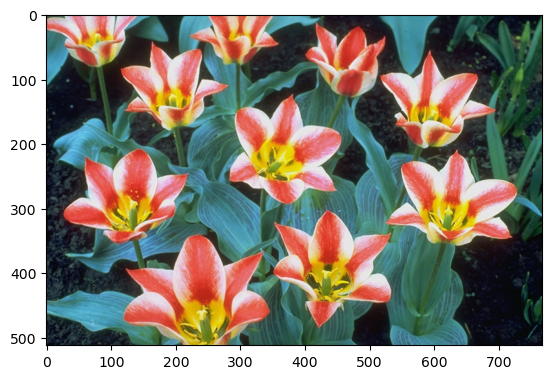

In [177]:
### import the packages and functions here ###
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#code goes here

#read image using pillow
image = Image.open("figures/tulips.png")
image_arr = np.array(image)
print("Shape:", image_arr.shape)
print("Type:", type(image_arr))


max, min = image_arr.max(), image_arr.min()

norm_img_arr = (image_arr - min) / (max - min)

print(norm_img_arr)

plt.imshow(norm_img_arr)

  * **Step 2**: Center-crop the image into dimension (200, 200, 3), meaning that you should crop the central portion of the image to the target height and width. For example:
  ![center_crop_img](figures/center-crop.jpg)

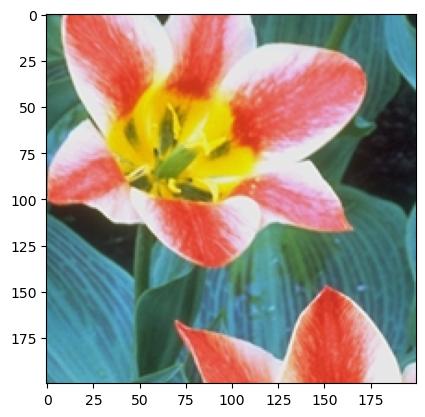

In [182]:
### import the packages and functions here ###
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


### your code goes here ###
#making the image 200x200 by slicing the image array 
height,width,channel = (norm_img_arr.shape)



cropim_arr = norm_img_arr[(int(height/2)-100):(int(height/2)+100), (int(width/2)-100):(int(width/2)+100)]

# plt.imshow(image_arr)
plt.imshow(cropim_arr)


  * **Step 3**: We will then apply filters to the processed image. In order to preserve the orginial dimensions (H, W, C) of the image after the filtering, we need to properly pad the image first. Similar to **PART I Step 3**, pad the image with zeros on all four edges. You can use [pad(...)][pad_doc] function from the numpy pacakge to do this.

[pad_doc]:https://numpy.org/doc/stable/reference/generated/numpy.pad.html

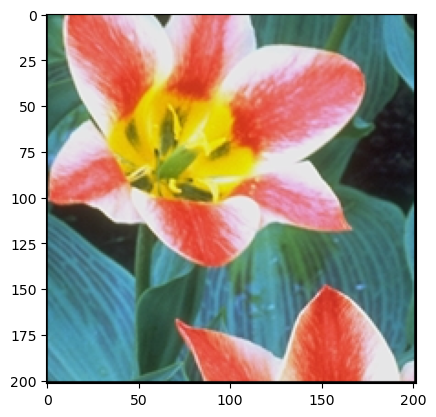

In [183]:
### import the packages and functions here ###
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

### your code goes here ###
pad_width = ((1,1), (1,1), (0,0))
pad_arr = np.pad(cropim_arr, pad_width, mode = 'constant', constant_values = 0)
plt.imshow(pad_arr)

  * **Step 4**: 2-D convolution is one of the very basic of operations of image processing. The 2-D convolution of a filter on an image is the operation of multiplying each pixel in the overlapping portion of the "sliding window" and then add these pixels together to make one output pixel. There is an excellent video explainning the basics [here][2d_conv_video]. You may read more [here][2d_conv]. 
    The pseudocode is shown below:
    ```
    for row in # of rows of output:
        for col in # of columns of output:
            for ch in # of channels of input/output:
                sum = 0
                for kh in # rows of filter:
                    for kw in # columns of filter:
                        sum += input[row+kh][col+kw][ch] * filter[kh][kw]
                output[row][col][ch] = sum
    ```
    
    It it important to note that this pseudocode is slightly different from what a convolution looks like in a Convolutional Neural Network (CNN). The difference comes from how we apply the filters. We will talk more about the convolutions in CNN later in the course. 
    
    Now, use the following filters to process the original picture and display the results. **You should write your own 2-D convolution kernel code derived from the above pseudocode instead of using existing pre-written conv functions from any packages.**
    
    As a side note, the original image has three channels, and you should apply the filter to each of the three channels separately.
 
    1. Gaussian Blur
    ``` Python
gaussian_filter = np.asarray([
    [1,  4,  6,  4,  1],
    [4, 16, 24, 16,  4],
    [6, 24, 36, 24,  6],
    [4, 16, 24, 16,  4],
    [1,  4,  6,  4,  1]
], dtype=np.float32)
gaussian_blur = gaussian_filter/np.sum(gaussian_filter)
    ```
    2. Motion Blur
    ``` Python
motion_filter = np.asarray([
    [1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 1],
], dtype=np.float32)
motion_blur = motion_filter/np.sum(motion_filter)
    ```
    3. Edge Detection
    ``` Python
edge_filter = np.asarray([
  [-1, -1, -1],
  [-1,  8, -1],
  [-1, -1, -1]
], dtype=np.float32)
    ```
[2d_conv_video]:https://www.youtube.com/watch?v=C_zFhWdM4ic
[2d_conv]:https://www.allaboutcircuits.com/technical-articles/two-dimensional-convolution-in-image-processing/


In [184]:
### import the packages and functions here ###
### your code goes here ###
### Part 1 Define a convolution function
def cf(image,filter):
    i, j, k =  image.shape
    w, h, = filter.shape
    output = np.zeros(((i-w), (j-h), k))
    for row in range(output.shape[0]):
        for col in range(output.shape[1]):
            for ch in range(output.shape[2]):
                sum = 0
                for kh in range(w):
                    for kw in range(h):
                        sum += image[row+kh][col+kw][ch] * filter[kh][kw]
                output[row][col][ch] = sum
    return output


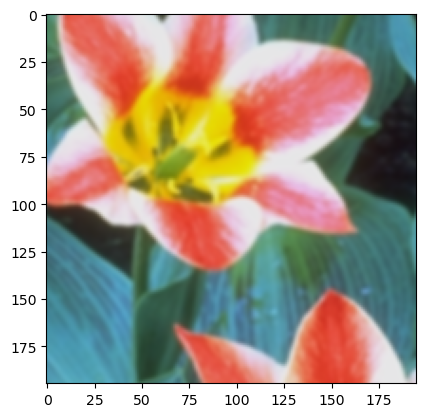

In [185]:
### Part 2 Apply the Gaussian filter
gaussian_filter = np.asarray([
  [1,  4,  6,  4,  1],
  [4, 16, 24, 16,  4],
  [6, 24, 36, 24,  6],
  [4, 16, 24, 16,  4],
  [1,  4,  6,  4,  1],
], dtype=np.float32)
gaussian_blur = gaussian_filter/np.sum(gaussian_filter)
### import the packages and functions here ###
### your code goes here ###
guass_img=cf(cropim_arr, gaussian_blur)
plt.imshow(guass_img)

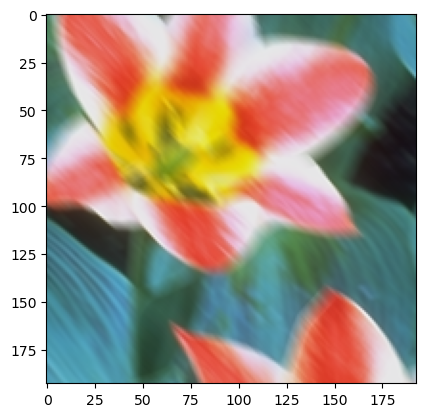

In [186]:
### Part 3 Apply the Motion Blur filter
motion_filter = np.asarray([
    [1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 1],
], dtype=np.float32)
motion_blur = motion_filter/np.sum(motion_filter)
### import the packages and functions here ###
### your code goes here ###
motion_img=cf(cropim_arr, motion_blur)
plt.imshow(motion_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


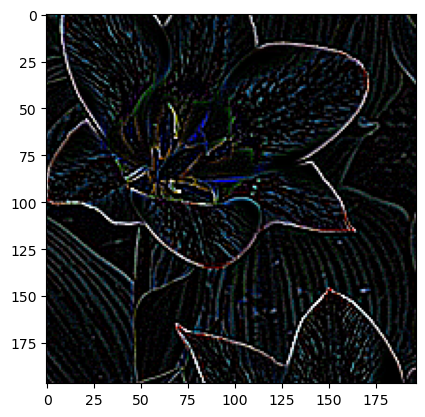

In [188]:
### Part 4 Apply the Edge Detection filter
edge_filter = np.asarray([
  [-1, -1, -1],
  [-1,  8, -1],
  [-1, -1, -1]
], dtype=np.float32)
### import the packages and functions here ###
### your code goes here ###
edge_img=cf(cropim_arr, edge_filter)
plt.imshow(edge_img)

 * **Step 5**: Also, we often need to downscale an image. We will use a basic algorithm to accomplish this: Gaussian pyramid. You can read about this technique [here][pyramid]. In this step, you will downsample the given image twice, each with a factor of two. In other words, you will first shrink the image to half of the size (2X smaller), then shrink it again by 2X. As a result, you will have an image that is one-fourth of its original size (4X smaller). We will try two approaches and see the difference.
    1. Naive downsampling: you simply pick the 2nd, 4th, 6th, ..., nth pixels (every two pixels) by skipping one pixel each time. The resulting image should have one half of the size of the original. You repeat this process to obtain the 1/4 size image.
    2. Gaussian pyramid: You apply the Gaussian filter to the image first, like what you have done in the previous step. After that, you downsample on the filtered image. Again, you pick the 2nd, 4th, 6th, ..., nth pixels by skipping one pixel each time when you downsample. Then, you repeat this process of "filter and downsample" to obtain the 1/4 size image. The Gaussian filter removes the high-frequency components from the image before downsampling, thus avoiding the aliasing problem as you will notice in the results.
    
    By displaying each picture in the process (two downsampled images per approach, four images in total), you may observe some difference in the results of the two techniques.
[pyramid]:https://en.wikipedia.org/wiki/Pyramid_(image_processing)#:~:text=pyramid%20generation%20steps.-,Gaussian%20pyramid,lower%20level%20of%20the%20pyramid.

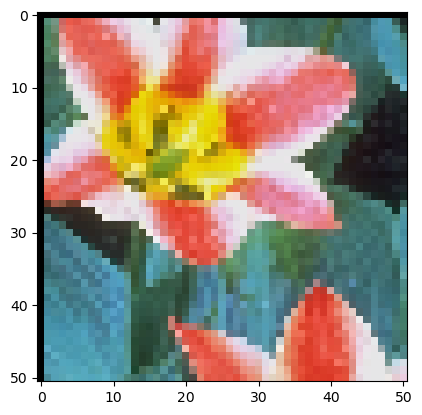

In [193]:
### import the packages and functions here ###
### your code goes here ###
### Part 1 Naive downsampling
down_sample_img = pad_arr[::2, ::2]
ds_img=down_sample_img[::2, ::2]
plt.imshow(ds_img)

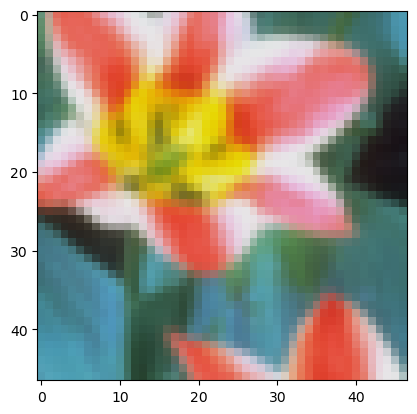

In [198]:
### import the packages and functions here ###
### your code goes here ###
### Part 2 Gaussian filter + downsampling
gaus1 = cf(pad_arr, gaussian_blur)
ds_img=gaus1[::2, ::2]
gaus2 = cf(ds_img, gaussian_blur)
ds_img2 =gaus2[::2, ::2]
plt.imshow(ds_img2)

## PART III: HTTP Communication, KNN and K-means in Python

In this part of the lab, we will implement a system that communicates with a server to acquire test data and perform [k-nearest neighbor][knn] (KNN) classification and K-means clustering on your computer.

The overall operation of the classification system is depicted in the following figure:

<!-- ![server_img](figures/server_behavior.svg) -->
<img src="figures/server_behavior.svg" width="60%">

The system works in a [RESTful][RESTful_tutorial]-like manner, and there are five main steps in the whole process:
1. **Request for data**
   The user sends an HTTP request with a specific body content to request a set of testing samples to be classified.
2. **Receive data**
   Upon receiving the request, the server will generate five random test IDs and select these samples from the testing dataset. Then, it sends back the test samples as a text string in comma-separated values (CSV) format in the response, and each sample will have a unique test ID and four separate features to be used for inference. For this part of the lab, we will use the classic [Iris dataset][iris_wiki]. The dataset is already randomly split into training and testing datasets. The training dataset will be provided to you, and the testing dataset will be stored on the server.
3. **Local inference**
   The local system parses the CSV file and performs the inference on the five input samples with kNN, which will be trained on the training dataset provided to you.
4. **Send results**
   Once the classes of the five samples are determined, create a new `POST` request with the test ID and the results and send them to the server for verification.
5. **Return verification**
   Upon receiving the request, the server will first use the test IDs to find the ground truth labels of the test samples and compare them with the ones from the `POST` request. Finally, the server sends back, in the response, a number indicating the number of correct classifications.

As introduced in the lecture, KNN is a classic machine learning algorithm that does not assume pre-defined parameters or data distributions. K is the number of nearest neighbors. When k = 1, the algorithm is simply the nearest neighbor algorithm. Intuitively, in the nearest neighbor algorithm, the unknown data point is classified as the same label as the known data point from which it has the least distance in the hyperspace, as shown in the following picture. 

![knn_k1_img](figures/knn_k1.png)

In the k-nearest neighbor algorithm, you pick k data points that are closest to the unknown data. The k known data points make a collective decision on which label the unknown data should be assigned. The following three pictures show the process. 

![knn_k_img](figures/knn_k.png)

<sup>(picture source: https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)</sup>

On the other side, K-means clustering is one of the most popular unsupervised machine learning algorithms. The K-means algorithm in data mining starts with a K group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids. The process is shown in the following picture.

It halts creating and optimizing clusters when either:

1. The centroids have stabilized — there is no change in their values because the clustering has been successful.
2. The defined number of iterations has been achieved.

<img src="figures/kmeans.png" width="500" height="500">
<!-- ![kmeans_img](figures/kmeans.png).size(0.5) -->

<sup>(picture source: https://towardsdatascience.com/k-means-a-complete-introduction-1702af9cd8c)</sup>

**Important**: You should only use the Python packages that are introduced in this lab: NumPy, Requests, and Pandas. You may use some plotting packages to visualize the datasets if you feel extra fancy. However, you should not use any machine learning packages such as scikit-learn.

[RESTful_tutorial]:https://restfulapi.net/
[knn]:https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
[iris]:https://courses.grainger.illinois.edu/ece479/sp2023/secure/labs/lab1/iris_train.csv
[iris_label]:https://courses.grainger.illinois.edu/ece479/sp2023/secure/labs/lab1/iris_label.csv
[iris_wiki]:https://en.wikipedia.org/wiki/Iris_flower_data_set


* **Step 1**: Download the Iris dataset from [here][iris] and the labels from [here][iris_label]. Read the csv datasets into arrays. You may use the following code:

    ``` Python
import pandas as pd
data = pd.read_csv('iris.csv', header=0, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
labels = pd.read_csv('iris_labels.csv', header=0, names=['label'])
    ```
[iris]:https://courses.grainger.illinois.edu/ece479/sp2023/secure/labs/lab1/iris_train.csv
[iris_label]:https://courses.grainger.illinois.edu/ece479/sp2023/secure/labs/lab1/iris_train_label.csv

In [224]:
### import the packages and functions here ###
### your code goes here ###
import pandas as pd 
data = pd.read_csv('iris_train.csv', header=0, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
labels = pd.read_csv('iris_train_label.csv', header=0, names=['label'])

training_data = np.array(data)
training_labels = np.array(labels)
print(training_data)
print(training_labels)


[[6.3 3.3 4.7 1.6]
 [6.5 3.  5.8 2.2]
 [5.6 2.5 3.9 1.1]
 [5.7 2.8 4.5 1.3]
 [6.4 2.8 5.6 2.2]
 [4.7 3.2 1.6 0.2]
 [6.1 3.  4.9 1.8]
 [5.  3.4 1.6 0.4]
 [6.4 2.8 5.6 2.1]
 [7.9 3.8 6.4 2. ]
 [6.7 3.  5.2 2.3]
 [6.7 2.5 5.8 1.8]
 [6.8 3.2 5.9 2.3]
 [4.8 3.  1.4 0.3]
 [4.8 3.1 1.6 0.2]
 [4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [5.4 3.9 1.3 0.4]
 [5.4 3.7 1.5 0.2]
 [5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [5.2 3.4 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  2.  3.5 1. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.7 4.2 1.3]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [7.7 3.8 6.

  * **Step 2**: Make a `POST` request with the following specifications:

    ``` Python
url = 'http://courses.grainger.illinois.edu/ece479/sp2023/lab1_request_dataset.php'
body = {'request': 'testdata'}
    ```
    Please read the first three sections of [guide](https://requests.readthedocs.io/en/master/user/quickstart/) to learn how to send HTTP requests and parse responses from the server.
    Also, make sure that you make request to `https` (SSL certificated) instead of `http`. If your request is properly made, the server should return a content in comma-separated values (CSV) format. Parse the content into an array, and this array will be used as your testing dataset in the following steps. 

In [218]:
### import the packages and functions here ###
### your code goes here ###
import requests
import io

url = 'https://courses.grainger.illinois.edu/ece479/sp2023/lab1_request_dataset.php'
body = {'request': 'testdata'}

#post request to the link
response = requests.post(url, data=body)

content = response.content.decode('utf-8') #converts bytes into python string

dataset = pd.read_csv(io.StringIO(content)) #convert the string response content to a text stream that pd.read_csv() can read from.


data_array = np.array(dataset) #convert into an array 


print(data_array)

[[ 3.   6.   2.9  4.5  1.5]
 [ 5.   5.4  3.4  1.5  0.4]
 [ 7.   6.9  3.1  5.1  2.3]
 [ 8.   6.2  2.2  4.5  1.5]
 [12.   5.5  3.5  1.3  0.2]]


* **Step 3**: We will use the Euclidean distance to find the nearest neighbors. Write a function that calculates the distance between two data points. Note: each data point has four features, which means each $X$ is a four-dimensional variable. Recall that the Euclidean distance is defined as $\sqrt{\sum_{i=1}^{N=4}(x^{(i)}_1-x^{(i)}_2)^2}$. 
  
  **Hint**: this can be easily done as a one-liner with Numpy, try to avoid using nested loops.

In [219]:
### import the packages and functions here ###
### your code goes here ###
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

euclidean_distance(data_array[0], data_array[1])


3.8496753109840314

* **Step 4**: Implement a function that predicts the classes of the five testing samples using kNN. To perform kNN for a testing sample, first calculate the Euclidean distances between the testing sample and all the samples in the training dataset that are given to you. Then, rank the training samples by their distances to the testing sample, and find the k points that have the least distances to the testing sample. Finally, take the most common labels of the k nearest neighbors and use that to classify the unknown testing data point. 
    You may experiment with different values of k to see if they give you different answers. We recommend that you try k = 3, 5, or 7.

In [281]:
### import the packages and functions here ###
### your code goes here ###

def test(train,test,k, label):

    for i in range(len(test)):
        dist_array = []
        print("TEST", i)
        for j in range(len(train)):
            temp = []
            temp.append(euclidean_distance(train[j], test[i]))
            temp.append(label[j][0])
            #print(temp)
            #dist_array[j] = temp
            dist_array.append(temp)
        #dist_array[dist_array==None]=np.nan
        numpy_dist_array = np.array(dist_array)
        #numpy_dist_array[0][0]
        numpy_dist_array_index = np.argsort(numpy_dist_array[:,0])
        numpy_dist_array=numpy_dist_array[numpy_dist_array_index]
        print(numpy_dist_array[0:k])
test(training_data,data_array[:,1:],3,training_labels)

TEST 0
[['0.19999999999999973' 'versicolor']
 ['0.24494897427831785' 'versicolor']
 ['0.33166247903553975' 'versicolor']]
TEST 1
[['0.282842712474619' 'setosa']
 ['0.30000000000000016' 'setosa']
 ['0.30000000000000016' 'setosa']]
TEST 2
[['0.24494897427831822' 'virginica']
 ['0.3605551275463994' 'virginica']
 ['0.4690415759823433' 'virginica']]
TEST 3
[['0.26457513110645864' 'versicolor']
 ['0.5099019513592786' 'versicolor']
 ['0.5385164807134505' 'virginica']]
TEST 4
[['0.3' 'setosa']
 ['0.33166247903553986' 'setosa']
 ['0.3464101615137756' 'setosa']]


* **Step 5**: Make a `POST` request again to the same URL. This time, the `request` field will be `verify`, and you should specify the two additional `test_ids` and the `predictions` fields. They should be in the form of ',' deliminated list, i.e. \"1,3,5,6,7\" for the `test_ids`. The structure of your request should be like the following:
```python
    {'request':'verify',
     'test_ids':'1,3,6,8,12',
     'predictions':'versicolor,setosa,versicolour,virginica,setosa'}
```
The server will return the number of correct predictions on the testing samples drawn from the testing dataset. The accuracy should be 100% in most cases.

In [291]:
### import the packages and functions here ###
### your code goes here ###
url = 'https://courses.grainger.illinois.edu/ece479/sp2023/lab1_request_dataset.php'
body = {'request':'verify',
     'test_ids':'3,5,7,8,12',
     'predictions':'versicolor,setosa,virginica,versicolor,setosa'}


#post request to the link
response = requests.post(url, data=body)

content = response.content.decode('utf-8') #converts bytes into python string
print(content)


5


* **Step 6**: Implement a function that finds the k centroids of the iris dataset using K-means. To perform K-means for a dataset, first, initialize random k centroids. Then for each data point, find the nearest euclidean distance to centroids and assign the point to that cluster. In addition, for each cluster, compute the new centroid equals the mean of all points assigned to that cluster. You should repeat the distance calculation, and centroids update until convergence or until the end of a fixed number of iterations. We recommend that you try k = 2, 3, or 4.

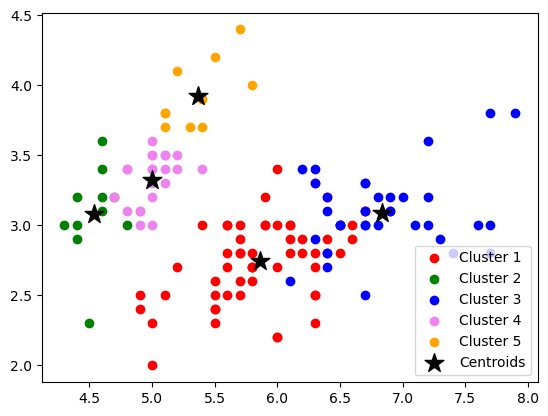

In [299]:
### import the packages and functions here ###
### your code goes here ###
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def k_means(data, k, num_iterations, distance_fn):
    # Initialize centroids randomly
    indices = np.random.choice(range(len(data)), k)
    centroids = data[indices]

    for _ in range(num_iterations):
        # Assign each data point to the closest centroid
        distances = np.zeros((k, len(data)))
        for i in range(k):
            for j in range(len(data)):
                distances[i, j] = distance_fn(data[j], centroids[i])
        labels = np.argmin(distances, axis=0)

        # Update centroids based on the mean of the assigned data points
        for i in range(k):
            mask = labels == i
            if np.sum(mask) > 0:
                centroids[i] = np.mean(data[mask], axis=0)

    return centroids

# Load the iris dataset
iris_data = training_data

# Perform K-means clustering with k = 3, 20 iterations, and Euclidean distance
centroids = k_means(iris_data, k=5, num_iterations=20, distance_fn=euclidean_distance)

# Plot the results
labels = np.zeros(len(iris_data))
for i in range(len(iris_data)):
    distances = [euclidean_distance(iris_data[i], c) for c in centroids]
    labels[i] = np.argmin(distances)

colors = ['r', 'g', 'b','violet','orange']
for i in range(5):
    plt.scatter(iris_data[labels == i, 0], iris_data[labels == i, 1], c=colors[i], label=f'Cluster {i + 1}')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505', label='Centroids')
plt.legend()
plt.show()



## Report Requirements: (10 pts)
You have to do a live demo for this lab during your designated lab session. In addition, you will need to turn in a report and the code. **We highly recommend that you directly use the provided Jupyter Notebook and turn it in as a combination of the report and the code.**

### Part 1: (2 pts)
* Show the code and the results of each step. Discuss your approaches for correct generations of all NumPy arrays **A** to **F**, with each worth 0.33 points.
* Since the code should be very short, you can either type it directly in the report or take screenshots of both the code and the resulting arrays and paste the screenshot into the report.
  
### Part 2: (3 pts)
* Show the results of each step. Discuss your appoarches. There is no need to include the code in the report. 
* For step 1, show the type and the shape of the array, print the original image. For step 2, show the cropped image. Nothing needs to be shown for step 3. The whole step 1 to 3 worth 1 point. 
* For step 4, show the resulting images of the three filtering processes. Step 4 worths 1 point.
* For step 5, show the four images from the two different approachs. Step 5 worths 1 point.
  
### Part 3: (5 pts)
* Show the results of each step. Discuss your appoarches. There is no need to include the code in the report. 
* For step 1, print the data you read from both csv files. For step 2, acquire at least 3 datasets from the server and print the response. You may take screenshots to show the prints. Step 1 and 2 worth 1 point.
* For step 3 and 4, briefly discuss your code, including what k values that you have tried. Show a screenshot of the two functions if they can be contained in one page. The code shouldn't be very long. Step 3 and 4 worth 2 points.
* For step 5, print the responses from the server. Step 5 worths 1 point.
* For step 6, print the centroid values of k=3. Step 6 worths 1 point.


### Notes: 
* Besides the above requirements, your report should also include the following details: 
  * Your full name and your NetID.
  * The difficulties/bugs you encountered and how you solved them
  * What you learned from this lab
* Your report should cover all the required information, but please keep your report clean and concise.
* Please add references to your report if you referred to any resources when you work on your lab.

